In [1]:
x=[0.1,0.10808081,0.11616162,0.12424242,0.13232323,0.14040404,
   0.14848485,0.15656566,0.16464646,0.17272727,0.18080808,
   0.18888889,0.1969697,0.20505051,0.21313131,0.22121212,
   0.22929293,0.23737374,0.24545455,0.25353535,0.26161616,
   0.26969697,0.27777778,0.28585859,0.29393939,0.3020202,
   0.31010101,0.31818182,0.32626263,0.33434343,0.34242424,
   0.35050505,0.35858586,0.36666667,0.37474747,0.38282828,
   0.39090909,0.3989899,0.40707071,0.41515152,0.42323232,
   0.43131313,0.43939394,0.44747475,0.45555556,0.46363636,
   0.47171717,0.47979798,0.48787879,0.4959596,0.5040404,
   0.51212121,0.52020202,0.52828283,0.53636364,0.54444444,
   0.55252525,0.56060606,0.56868687,0.57676768,0.58484848,
   0.59292929,0.6010101,0.60909091,0.61717172,0.62525253,
   0.63333333,0.64141414,0.64949495,0.65757576,0.66565657,
   0.67373737,0.68181818,0.68989899,0.6979798,0.70606061,
   0.71414141,0.72222222,0.73030303,0.73838384,0.74646465,
   0.75454545,0.76262626,0.77070707,0.77878788,0.78686869,
   0.79494949,0.8030303,0.81111111,0.81919192,0.82727273,
   0.83535354,0.84343434,0.85151515,0.85959596,0.86767677,
   0.87575758,0.88383838,0.89191919,0.9]

y = [-2.24812911, -2.30215341, -2.34463875, -2.38651064,
     -2.43190693, -2.44713884, -2.49003176, -2.51006098, 
     -2.55831541, -2.57056931, -2.59340317, -2.64026441, 
     -2.65975636, -2.69517476, -2.71046599, -2.74422696, 
     -2.76251291, -2.79505506, -2.79301352, -2.82852207, 
     -2.854651, -2.88654236, -2.92345136, -2.91943321, 
     -2.94240833, -2.9487781, -2.97926813, -2.99198343, 
     -3.03396292, -3.03814694, -3.04944858, -3.07196161, 
     -3.09883706, -3.11338258, -3.11898122, -3.14254571, 
     -3.18330957, -3.17453301, -3.20021237, -3.21213539, 
     -3.23715191, -3.24017664, -3.23640684, -3.26147762, 
     -3.28208909, -3.29453546, -3.31160478, -3.33188752, 
     -3.33320305, -3.35238927, -3.34176317, -3.37471911, 
     -3.37543159, -3.40452694, -3.40505804, -3.43358858, 
     -3.43596139, -3.43705603, -3.45264647, -3.46029402, 
     -3.45723979, -3.4720453, -3.47597438, -3.4795529, 
     -3.50118552, -3.5031452, -3.5097196, -3.51083668, 
     -3.51128397, -3.52708836, -3.5222885, -3.53317295, 
     -3.50965143, -3.51939652, -3.51659198, -3.50734187, 
     -3.50882329, -3.48129755, -3.49384658, -3.48813707, 
     -3.48345018, -3.46180698, -3.44784696, -3.42372263, 
     -3.39080674, -3.37867045, -3.35281766, -3.32575498, 
     -3.28934964, -3.26814804, -3.23547615, -3.1707224, 
     -3.12910072, -3.09300443, -3.02523152, -2.9453774, 
     -2.89454317, -2.83662685, -2.75433056, -2.68946573]

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x_mean = np.mean(x)
y_mean = np.mean(y)
x_norm = np.array((x - x_mean) / abs(np.max(x)))
y_norm = np.array((y - y_mean) / abs(np.max(y)))



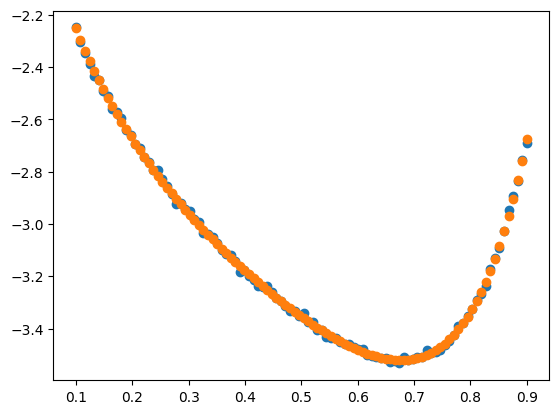

In [3]:
from scipy.optimize import minimize

def model_func(x, w1, w2, w3, w4):
    return w1 * x**(w2) + w3 * x**(w4)

def RMSE(params, x, y_true):
    w1, w2, w3, w4 = params
    y_pred = model_func(x, w1, w2, w3, w4)
    return np.sqrt(np.mean((y_true - y_pred)**2))

initial_guess = [-1,-2,3,4]
result = minimize(RMSE, initial_guess, args=(x, y), 
                  method='BFGS')
w = result.x

plt.scatter(x, y)
plt.scatter(x, model_func(x, w[0], w[1], w[2], w[3]))

In [ ]:
def fibonacci_sequence(n):
    if n <= 0:
        return np.array([], dtype=int)
    elif n == 1:
        return np.array([1], dtype=int)
    
    fib = np.zeros(n, dtype=int)
    fib[0] = 1
    fib[1] = 1
    
    for i in range(2, n):
        fib[i] = fib[i-1] + fib[i-2]
    
    return fib

def root_fib(function, x, max_iter):
    a, b = x[0], x[-1]
    
    fib_seq = fibonacci_sequence(max_iter + 2)
    
    x_1 = a + (b - a) * fib_seq[max_iter-2] / fib_seq[max_iter]
    x_2 = a + (b - a) * fib_seq[max_iter-1] / fib_seq[max_iter]
    
    f_1, f_2 = function(x_1), function(x_2)
    
    for i in range(max_iter):
        k = max_iter - i - 1
        
        if f_1 > f_2:
            a = x_1
            x_1 = x_2
            x_2 = b - (x_1 - a)
            f_1 = f_2
            f_2 = function(x_2)
        else:
            b = x_2
            x_2 = x_1
            x_1 = a + (b - x_2)
            f_2 = f_1
            f_1 = function(x_1)
    
    return (a + b) / 2

def dichotomy_method(function, x, max_iter, epsilon=1e-8):

    a, b = x[0], x[-1]
    
    for i in range(max_iter):
        mid = (a + b) / 2
        x1 = mid - epsilon
        x2 = mid + epsilon
        
        f1 = function(x1)
        f2 = function(x2)
        if f1 < f2: 
            b = x2 
        else:
            a = x1
    
    return (a + b) / 2

def derivative(function):
    h = 1e-8
    
    def df(x):
        return (function(x + h) - function(x - h)) / (2 * h) 
    
    return df

def find_minimas(function, x, max_iter, n_splits, method='fibonacci'):

    intervals = np.array_split(x, n_splits)
    roots = []
    
    for interval in intervals:
        if method == 'fibonacci':
            root = root_fib(function, interval, max_iter)
        elif method == 'dichotomy':
            root = dichotomy_method(function, interval, max_iter)
            
        if (np.round(root, 3) not in roots) and (np.round(root, 3) not in [np.round(interval[0], 3), np.round(interval[-1], 3)]):   
            roots.append(np.round(root, 3))
    
    minimas = np.array(roots)
    return minimas


x = np.linspace(-10, 10, 1000000)

functions = [lambda x: x**3 / 3 - x**2,
             lambda x: x**4 - 2*x**2,
             lambda x: x*np.exp(-x**2/2),
             lambda x: 3*x**4 - 8*x**3 + 6*x**2,
             lambda x: (x - 5)*np.exp(x),
             lambda x: (x**2 - 3) / (x + 2)]

for i, function in enumerate(functions):
    
    minimas = find_minimas(function, x, 50, 13, method='fibonacci')
    print(f'Для функции {i} минимум по фибоначчи в x={minimas}')

minimas = []
for i, function in enumerate(functions):
    
    minimas = find_minimas(function, x, 50, 13, method='dichotomy')
    print(f'Для функции {i} минимум дихотомией в x={minimas}')

Для функции 0 минимум по фибоначчи в x=[2.]
Для функции 1 минимум по фибоначчи в x=[-1.  1.]
Для функции 2 минимум по фибоначчи в x=[-1.]
Для функции 3 минимум по фибоначчи в x=[-0.]
Для функции 4 минимум по фибоначчи в x=[4.]
Для функции 5 минимум по фибоначчи в x=[-1.]
Для функции 0 минимум дихотомией в x=[2.]
Для функции 1 минимум дихотомией в x=[-1.  1.]
Для функции 2 минимум дихотомией в x=[-1.]
Для функции 3 минимум дихотомией в x=[0.]
Для функции 4 минимум дихотомией в x=[4.]
Для функции 5 минимум дихотомией в x=[-1.]


In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def f(params):
    x, y = params
    return 20 + x**2 + y**2 - 10*np.cos(2*np.pi*x) - 10*np.cos(2*np.pi*y)

def find_extrema_strict(_type='minima'):
    extrema = []

    if _type == 'minima':
        func = f
    elif _type == 'maxima':
        func = lambda params: -f(params) 

    x_grid = np.linspace(-5.5, 5.5, 50)  
    y_grid = np.linspace(-5.5, 5.5, 50)
    
    for x in x_grid:
        for y in y_grid:
            x0 = [x, y]
            result = minimize(func, x0, method='BFGS', tol=1e-12)
            current_extr = result.x
            extrema.append(tuple(current_extr))
    
    return extrema

minima = find_extrema_strict(_type='minima')
maxima = find_extrema_strict(_type='maxima')

plt.figure(figsize=(14, 12))

minima_x = [pos[0] for pos in minima]
minima_y = [pos[1] for pos in minima]
plt.scatter(minima_x, minima_y, c='blue', s=80, alpha=0.8, 
           edgecolors='black', linewidth=1, label='Минимумы')

maxima_x = [pos[0] for pos in maxima]
maxima_y = [pos[1] for pos in maxima]
plt.scatter(maxima_x, maxima_y, c='red', s=80, alpha=0.8, 
           edgecolors='black', linewidth=1, label='Максимумы')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Экстремумы функции Растригина')
plt.legend()
plt.xlim(-5.5, 5.5)
plt.ylim(-5.5, 5.5)
plt.show()

На первой наискорейший спуск, на втором сопряженные градиенты, ибо шаги первого строго ортогональны линиям уровня (ЗаМкНуТыЕ лИнИи)

Потому что градиент указывает строго ортогонально линиям уровня, а в таком случае на каждом шаге исправляется только какая-то малая проекция ошибки $(\vec{x_n} - \vec{x^*}, - \vec{\nabla}f) \propto \varepsilon$


В "вытянутых множествах" значение функции вдоль одной из локальных координат меняется значительно быстрее, чем вдоль других, т.е. линии уровня можно задать n-1 переменной и 1 квазисвободным параметром, т.е. линеаризованная матрица близка к вырожденной. $\sigma_i \rightarrow 0, \ \lambda_i \rightarrow 0, \ \nu \rightarrow \infty$


Из рисунка можно увидеть одну из причин, почему такой спуск говно и не адаптивен к множеству вообще нисколько, в отличие от других спусков. В нормальных координатах пкф около минимума может и работает, но если глобально у функции поведение другое, то метод тоже говно

In [ ]:
import numpy as np
from scipy.optimize import line_search
import matplotlib.pyplot as plt

def функция(x):
    x0, x1 = x
    return 0.5 * (x0**4 - 16*x0**2 + 5*x0 + x1**4 - 16*x1**2 + 5*x1)

def градиент(x):
    x0, x1 = x
    return np.array([0.5*(4*x0**3 - 32*x0 + 5), 0.5*(4*x1**3 - 32*x1 + 5)])

def сопряженные_градиенты(x0, метод='HS', макс_итераций=1000, точность=1e-6):
    x = x0.copy()
    r = -градиент(x)
    S = r.copy()
    k = 0
    история = [x.copy()]
    
    while np.linalg.norm(r) > точность and k < макс_итераций and np.linalg.norm(r) < 1e2:

        альфа = line_search(функция, градиент, x, S)[0]

        if альфа is None:
            альфа = 0.001
            
        x_новый = x + альфа * S
        r_новый = -градиент(x_новый)
        
        дельта_r = r_новый - r
        
        if метод == 'HS':
            бета = np.dot(r_новый, дельта_r) / np.dot(S, дельта_r)
        elif метод == 'FR':
            бета = np.dot(r_новый, r_новый) / np.dot(r, r)
        elif метод == 'PR':
            бета = np.dot(r_новый, дельта_r) / np.dot(r, r)
        elif метод == 'CD':
            бета = np.dot(r_новый, r_новый) / np.dot(-S, r)
        elif метод == 'LS':
            бета = np.dot(r_новый, дельта_r) / np.dot(-S, r)
        elif метод == 'DY':
            бета = np.dot(r_новый, r_новый) / np.dot(S, дельта_r)
        elif метод == 'HZ':
            знаменатель = np.dot(S, дельта_r)
            if abs(знаменатель) < 1e-12:
                бета = 0
            else:
                член1 = дельта_r - 2 * S * (np.linalg.norm(дельта_r)**2 / знаменатель)
                бета = np.dot(член1, r_новый / знаменатель)
        
        S = r_новый + бета * S
        x = x_новый
        r = r_новый
        история.append(x.copy())
        k += 1
    
    return np.array(история), k


методы = ['HS', 'FR', 'PR', 'CD', 'LS', 'DY', 'HZ']
начальные_точки = [(0.1, -1), (0.1, -1.1), (0, -1)]
цвета = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']
    
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
    
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = функция([X[i, j], Y[i, j]])
    
for idx, точка in enumerate(начальные_точки):

    plt.figure(figsize=(10, 8))
    контур = plt.contour(X, Y, Z, levels=30, alpha=0.6)
    plt.scatter([-2.9034], [-2.9034], s=100, c='r')
    
    for i, метод in enumerate(методы):

        x0 = np.array(точка)
        история, итерации = сопряженные_градиенты(x0, метод=метод)
        конечное_f = функция(история[-1])
            
        plt.plot(история[:, 0], история[:, 1], 'o-', color=цвета[i], 
                    markersize=2, linewidth=1, label=f'{метод} ({итерации} итер.)')
        plt.legend()

    plt.plot(точка[0], точка[1], 'ko', markersize=8, label='Старт')
        
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Начальная точка: {точка}')
    plt.axis('equal')
    plt.show()
